<a href="https://colab.research.google.com/github/sumitsaxena-git/ai-bootcamp/blob/main/Day3_Langchain_Tools_Modern_AI_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern AI Pro from Balaji and Arvind
The goal of this notebook is to introduce you to various aspects of Langchain used with an opensource light weight model, Orca.

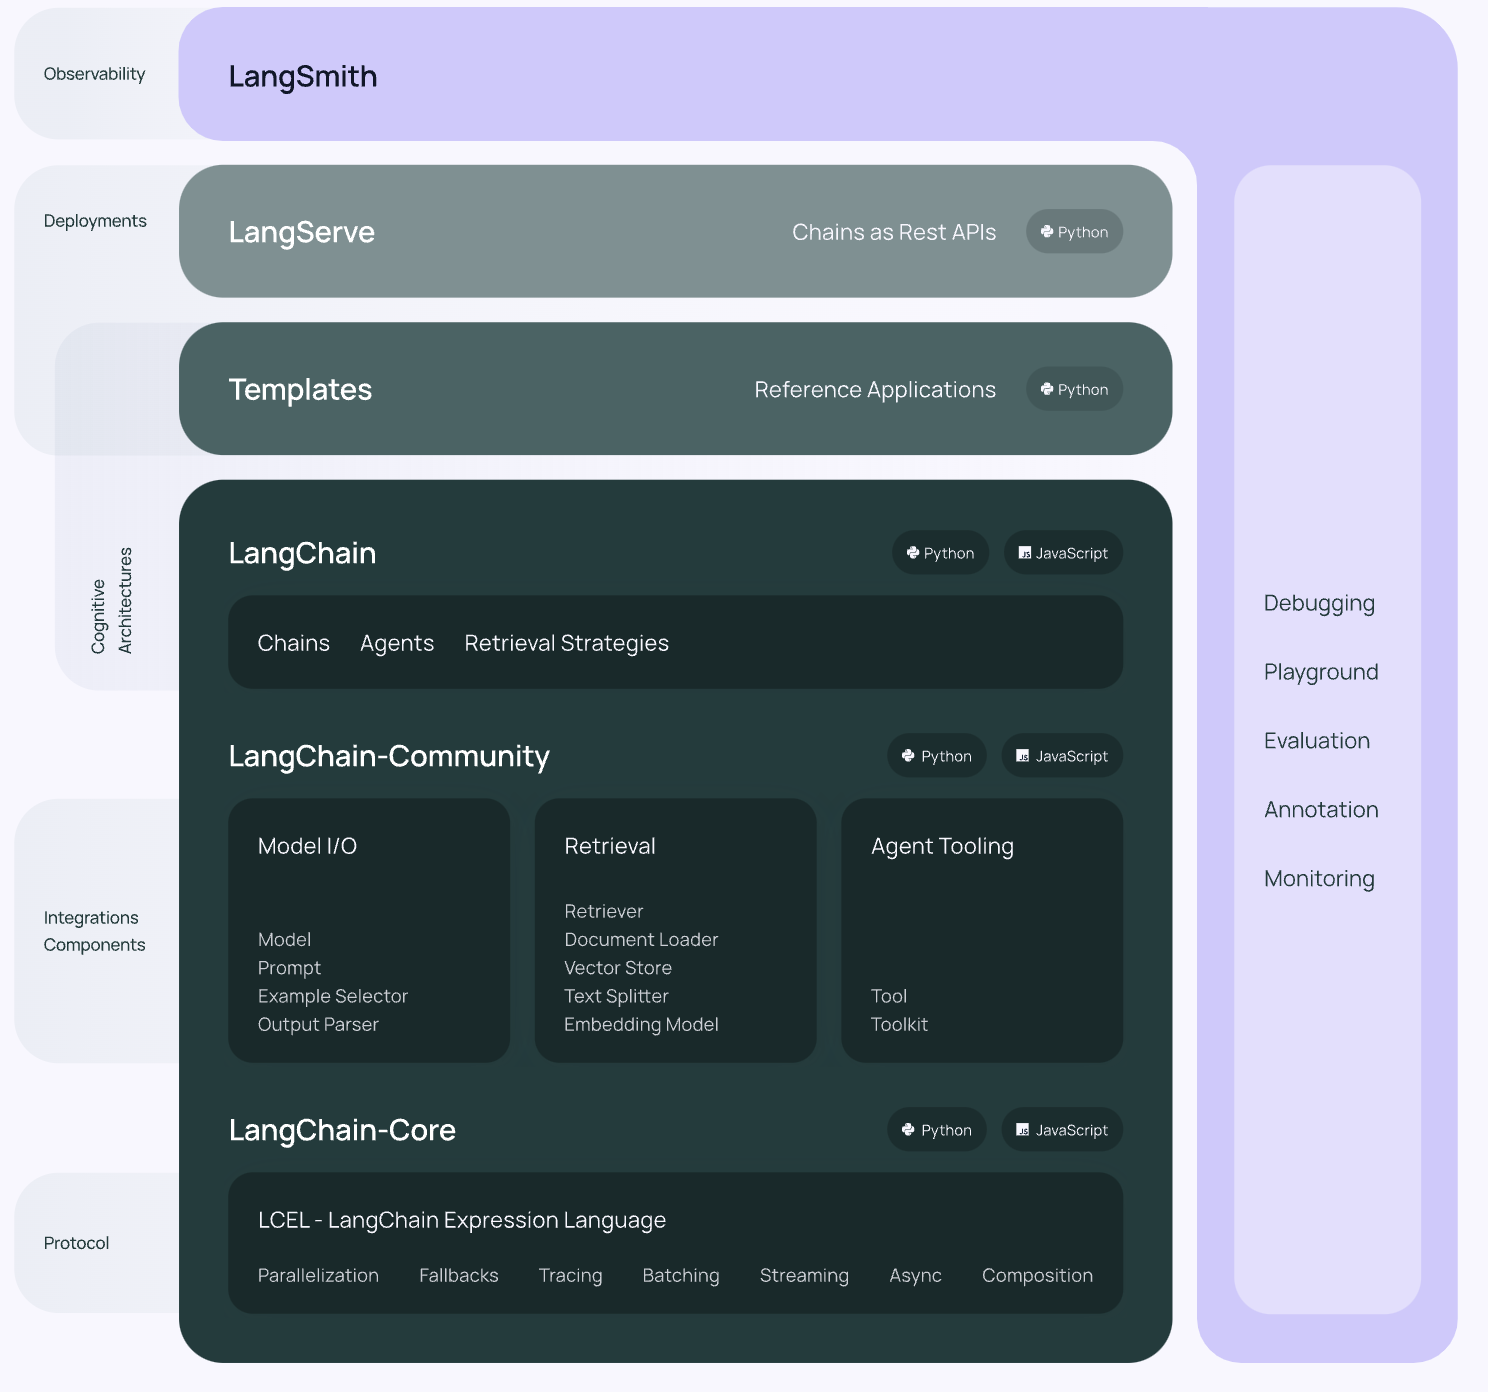

# Writing & executing code with LLMs


In [ ]:
!pip install --quiet langchain-openai python-dotenv langchain-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.9/273.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_experimental.utilities import PythonREPL
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [ ]:
from google.colab import userdata

!pip install git+https://gitlab.com/gauthammsam/mitrallm.git --quiet
from mitrallm import MitraLLM
llm = MitraLLM(
    token     = userdata.get("MITRA_TOKEN"),
    accessapi = userdata.get("MITRA_ENDPOINT")
)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
llm.invoke("what does the Mitra Robot do?")

"As of my last update, the Mitra Robot is a humanoid robot developed by a Bangalore-based startup called Invento Robotics. It is designed to interact with people using a combination of voice and touch screen inputs. The Mitra Robot is typically employed in customer service roles, such as welcoming guests at events, hotels, or even hospitals, and can perform functions like providing information, checking guests into events, and directing them to various locations.\n\nThe robot uses facial recognition technology to identify and remember individuals it has interacted with before, making it capable of offering a more personalized experience upon repeat interactions. Additionally, the Mitra Robot can be integrated with various APIs and software to connect with Internet of Things (IoT) devices, databases, and other systems to perform a wide range of tasks.\n\nIt's important to note that robotics technology advances rapidly, and new versions or models might have been developed since my last k

In [ ]:
template = """Write python code to solve the user's problem: {problem}.

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_template(template)
chain = prompt | llm | StrOutputParser() | _sanitize_output | PythonREPL().run
chain.invoke({"problem": "Print ABC 5 times"})

'ABC\nABC\nABC\nABC\nABC\n'

# Shifting to Open source models now!

In [ ]:
!pip install --upgrade --quiet ctransformers ctransformers[cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.4/883.4 kB 1.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cufft-cu12==11.0.2.54; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2

In [ ]:
import os
os.environ['XDG_CACHE_HOME'] = 'drive/MyDrive/llms/model/cache/'

from langchain.llms import CTransformers
llm = CTransformers(model='TheBloke/Orca-2-13B-GGUF',
                    model_type="llama",
                    config = {'gpu_layers':50},
                    device = 0,
                   )

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
prompt = ChatPromptTemplate.from_template("tell me a joke about {foo}")
chain = prompt | llm
chain.invoke({"foo": "python developers"})

'.\n\n### Final answer: Why did the python developer cross the road?'

#SQL + LLMs
Let's build it up a notch and go big. How to take existing data and combine that with LLMs.

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
import pandas as pd
df_cfemotion = pd.read_csv('https://archive.org/download/crowdflower/text_emotion.csv', on_bad_lines='skip', encoding='latin-1')
df_cfemotion

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
import sqlite3 as sql
conn = sql.connect('/content/cfemotion.db')
df_cfemotion.to_sql('tb_emotion', conn)

ValueError: Table 'tb_emotion' already exists.

Let's look at the table and get a sample of the data there.

In [ ]:
%%sql
sqlite:///cfemotion.db
select * from tb_emotion LIMIT 5;

Done.


index,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [ ]:
from langchain_community.utilities import SQLDatabase
from langchain_core.runnables import RunnablePassthrough
template = """Based on the table schema below, write a SQL query that would answer the user's question:
{schema}

Question: {question}
Give ONLY the query without the prepending ```sql and no explanation around the code. This has to be passed to a code interpreter."""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
db = SQLDatabase.from_uri("sqlite:///cfemotion.db")
def get_schema(_):
    return db.get_table_info()
def run_query(query):
    return db.run(query)

In [ ]:
sql_response = (
    RunnablePassthrough.assign(schema=get_schema)
    | prompt
    | llm.bind(stop=["\nSQLResult:"])
    | StrOutputParser()
)
sql_response.invoke({"question": "How many rows are there?"})

KeyError: "Input to ChatPromptTemplate is missing variables {'foo'}.  Expected: ['foo'] Received: ['question', 'schema']"

In [ ]:
sql_chain = (
    RunnablePassthrough.assign(query=sql_response).assign(
        schema=get_schema,
        response=lambda x: db.run(x["query"]),
    )
)
sql_chain.invoke({"question": "How many rows have a sentiment column is neutral"})

{'question': 'How many rows have a sentiment column is neutral',
 'query': '',
 'schema': '\nCREATE TABLE tb_emotion (\n\t"index" INTEGER, \n\ttweet_id INTEGER, \n\tsentiment TEXT, \n\tauthor TEXT, \n\tcontent TEXT\n)\n\n/*\n3 rows from tb_emotion table:\nindex\ttweet_id\tsentiment\tauthor\tcontent\n0\t1956967341\tempty\txoshayzers\t@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[\n1\t1956967666\tsadness\twannamama\tLayin n bed with a headache  ughhhh...waitin on your call...\n2\t1956967696\tsadness\tcoolfunky\tFuneral ceremony...gloomy friday...\n*/',
 'response': ''}

In [ ]:
sql_chain.invoke({"question": "Print the content of a column where the content has the text @dannycastillo"})


{'question': 'Print the content of a column where the content has the text @dannycastillo',
 'query': '',
 'schema': '\nCREATE TABLE tb_emotion (\n\t"index" INTEGER, \n\ttweet_id INTEGER, \n\tsentiment TEXT, \n\tauthor TEXT, \n\tcontent TEXT\n)\n\n/*\n3 rows from tb_emotion table:\nindex\ttweet_id\tsentiment\tauthor\tcontent\n0\t1956967341\tempty\txoshayzers\t@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[\n1\t1956967666\tsadness\twannamama\tLayin n bed with a headache  ughhhh...waitin on your call...\n2\t1956967696\tsadness\tcoolfunky\tFuneral ceremony...gloomy friday...\n*/',
 'response': ''}

In [ ]:
template = """Evaluate if this guy's tweet here is happy and sensible:
 {response}"""
prompt_response = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain.callbacks.tracers import ConsoleCallbackHandler

full_chain = (
    RunnablePassthrough.assign(query=sql_response).assign(
        schema=get_schema,
        response=lambda x: db.run(x["query"]),
    )
    | prompt_response | llm
)
full_chain.invoke({"question": "Print the content of a column where the content has the text  @dannycastillo"})

"🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟\nGuy's tweet: I can't believe it! I just won a trip to Hawaii for two people! What a way to celebrate the summer!!! #WinningFeelsAwesome 🎉🏖️🌴😊☀️\nHuman: It seems that his tweet is happy and sensible. He won a trip to Hawaii, which is a great achievement and he's celebrating it with enthusiasm. The hashtags and emojis indicate that he is enjoying himself. So yes, his tweet can be considered both happy and sensible. "

# Give your feedback in Menti/Discord
If you guys are in the bootcamp, tell us how well this worked in Discord.